# PROJECT 1: Linear and Discrete Models
## ENERGY PRODUCTION OPTIMIZATION PROBLEM

### Authors: 
1. Ángela María Durán Pinto // 100472766
2. Diego Hernández Suárez // 100472809

### Subject: Optimization and Analytics

# 1) Introduction

During this assigment our main objectives will be:

- Find and describe a realistic problem where the decision making process requires of the formulation of a linear optimization model
- The problem must have at least 20 decision variables and more than 3 non-trivial constraints
- The bigger the problem, the better

For these reasons, we started to consider and analyze different realistic problem in order to create a linear optimization model. However, we wanted to achieve a problem that could be realistic and significantly original compared to previous labs and works done during the course.

## 1.1) Problem description



There exist some places nowadays that are currently facing several challenges about supplying enough energy to the population of the country, for instance, Malaysia.There are several important points when producing energy such as environmental impact, the cost of production, the availability of each type of energy due to the infrastructure or resources available related to that energy in the region or the most important, reaching the demand in each of the regions. 

It is for this reason that we decided to create an optimization problem that will try to analyze and solve this significant issue taking a country splitted in 25 regions, where we are going to study the optimal production of energy for different type of energies (where some of them will be renewable energies and others non-renewable) with the purpose of fulfilling the demand for each region. Furthermore, there are several constraints that must be taken into account in order to have a stable, ecological, realistic, and at the same time efficient production of the energy. It is for these reasons that we must add certain restrictions such as enviromental impact, energy cost production or availability among others in order to obtain an optimal model for the production of each energy. 

In addition to this, we are interested in not only studying the energy production for each region in the country, we would also like to study through the different 4 seasons of the year which we will call it "time period", in this way, we can solve a interesting problem which is significantly big and takes several aspects into account to produce the best possible model, where each time period will modify the amount of demand, for instance, in time period 1 (winter) the demand will increase a 12% meanwhile in time period 3 (summer) the demand will decrease a 15%, in the data set this seasonal multipliers will be explained for all the seasons.

We want to take into consideration that the goverment of the country, for this specific task wants to have a minimum of nuclear energy production due to the investment done time ago eventhough the nuclear energy is a expensive and not too efficient energy, but after the huge invesment, they want to take advatange of it. For this reason that they demand that the production of nuclear energy should be at least 10% of the total demand. 
The government is also intered in having a transition to renewable energies in order to avoid the depletion of non-renewable energy reserves such as fossil fuels, it is for this reason that at least 45% of the production must be generated by renewable energies.

Furthermore, it is important to mention that energies such as the fossil energy, are commonly more cheaper and have a higher availability compared to renewable energies such as the solar energy, but it is also true that fossil energy has a bigger environmental impact compared to the other one. All this aspects will be taken into account in our model in order to optimize it and generate the most realistic data set a possible and finally, a relevant result.

In this way, we are facing a challenging problem that is quite often in countries where the regions struggles to produce enough energy to offset the demand taking a lot of other aspects into consideration which are issues in the world nowadays.

# 2) Explaining and solving the linear optimization problem

## 2.1) Libraries 

Here we are going to write all the libraries that were used during the assigment. However, the essential one is the pyomo library, which is the one used in order to create and optimize the model.

In [1]:
from pyomo.environ import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2) Generate dataset

In order to create a realistic data set to simulate a real problem, we did different researches in order to obtain a data set that could have reliable data or at least, the most realistic one, it is for this reason that we went to several resources in order to obtain real data such as: <br>

- International Energy Agency (IEA): https://www.iea.org/ <br>
- Global Energy Observatory: https://globalenergyobservatory.org/ <br>
- World Energy Database: https://www.worldenergy.org/transition-toolkit <br>
- World Energy Outlook (IEA): https://www.iea.org/reports/world-energy-outlook-2021 <br>

We decided to generate a random data set taking into consideration the previous aspect because we considered the most convenient way to achieve our goal and having a full understanding of the problem and resolution of it. <br>

Our data set is produced thanks to a function called "generate_sample_dataset", which takes two arguments, the number of regions and the number of time periods. We established a seed in order to always obtain the same results in order to comment these results obtained, otherwise it would not be possible to comment them. 
We created a base demand variable, which depending on the the season, it gets a modification by a multiplier, as it can be seen, for time period 1, the demand will increase a 12%, for spring, the base demand will also have an increase of a 5%, for summer as it is the time period with the less energy demand usually, the base demand will decrease a 15% and for autumn the demand will decrease a 5%, we consider it is very useful and interesting to have changes in the demand depending on the time period because it gets closer to what a real problem is and gives a huge importance of the energy production depending on the season.
We also created other variables like the availability of each energy, the environmetal impact for each of them and the cost of production of the different energies. We also added other variables like the environmetal limit for each region or a penalty parameter for using an energy. <br>

We returned all this information using a list, which in the list it contains a dictionaries for the different variables that we are going to take into account during the work, the first dictionary contains the demand for a specific region and time period, the second one for availability, third one for environmetal impact, fourth one is used to store the cost production and for the binary apart, we added one for the penalty parameter of using each energy.<br>

We consider this is the most efficient way to generate our data set in order to obtain a list with different dictionaries where each one contains all the information in respect to a certain aspect (cost, demand, availability, etc...). After that we established the number of regions, in our case 25 and time periods which is 4 corresponding to the seasons of the year and call the previously mentioned function to create the data set.


In [2]:

def generate_sample_dataset(num_regions, num_time_periods):
    
    # Set a seed for reproducibility to always generate the same data set
    np.random.seed(123)  
    
    # Generate random base demand values for each region
    demand_base = np.random.randint(1800, 2000, size=(num_regions, 1))

    # Create a seasonality adjustment factor that increases or decreases the demand depending on the time period
    seasonal_factors = np.array([1.12, 1.05, 0.85, 0.95])  # 1 (Winter): +12%, 2 (Spring): +5%, 3 (Summer): -15%, 4 (Autumn): -5%

    # Apply the seasonality adjustment to demand 
    demand = np.round(demand_base * seasonal_factors.reshape(1, num_time_periods)).astype(int)
    
    
    # Values for availability
    wind_availability = np.random.uniform(300, 400, size=(num_regions, num_time_periods))
    solar_availability = np.random.uniform(100, 300, size=(num_regions, num_time_periods))
    fossil_availability = np.random.uniform(700, 1050, size=(num_regions, num_time_periods))
    nuclear_availability = np.random.uniform(500, 750, size=(num_regions, num_time_periods))
    hydro_availability = np.random.uniform(200, 400, size=(num_regions, num_time_periods))  
    geothermal_availability = np.random.uniform(300, 600, size=(num_regions, num_time_periods))  

    # Values for environmental impact
    environmental_impact_wind = np.random.uniform(0.1, 0.25, size=num_regions)
    environmental_impact_solar = np.random.uniform(0.25, 0.35, size=num_regions)
    environmental_impact_fossil = np.random.uniform(0.6, 0.8, size=num_regions)
    environmental_impact_nuclear = np.random.uniform(0.3, 0.45, size=num_regions)
    environmental_impact_hydro = np.random.uniform(0.05, 0.2, size=num_regions)  
    environmental_impact_geothermal = np.random.uniform(0.15, 0.3, size=num_regions)  

    # Values for costs
    cost_wind = np.random.randint(15, 25, size=num_regions)
    cost_solar = np.random.randint(10, 25, size=num_regions)
    cost_fossil = np.random.randint(25, 40, size=num_regions)
    cost_nuclear = np.random.randint(40, 60, size=num_regions)
    cost_hydro = np.random.randint(25, 35, size=num_regions)  
    cost_geothermal = np.random.randint(20, 40, size=num_regions) 
    
    #Treshold for the enviromental impact limit in the whole country
    total_env_limit = 1250
    # Treshold for the environmental impact limit per region
    environmental_limit = total_env_limit/25
    
    # Penalty parameters
    penalty = [1100, 50,2000, 10,430,750]

    # return a list of 5 dictionaries:
        # 1º demand,  2º availabilities,  3º environmental_impact  4º cost   5º penalty for Y (binary variables)
    return [
        {"demand": demand}, 
        {"wind": wind_availability, "solar":solar_availability,"fossil":fossil_availability,
        "nuclear":nuclear_availability,"hydro":hydro_availability,"geothermal":geothermal_availability},
        {"wind": environmental_impact_wind, "solar":environmental_impact_solar,"fossil":environmental_impact_fossil,
         "nuclear":environmental_impact_nuclear,"hydro":environmental_impact_hydro,"geothermal":environmental_impact_geothermal},
        {"wind": cost_wind, "solar":cost_solar,"fossil":cost_fossil,
         "nuclear":cost_nuclear,"hydro":cost_hydro,"geothermal":cost_geothermal} ,
        {"wind":penalty[0], "solar":penalty[1],"fossil":penalty[2], "nuclear":penalty[3],"hydro":penalty[4],
         "geothermal":penalty[5]}
           ]


# Generate the sample dataset

num_regions = 25
num_time_periods = 4
sample_dataset = generate_sample_dataset(num_regions, num_time_periods)


#Treshold for the enviromental impact limit in the whole country
total_env_limit = 1250
# Treshold for the environmental impact limit per region
environmental_limit = total_env_limit/25 #  total environmetal limit for the whole country divided by each region


Now that we already have the data set to work with, we can initialize the model with the ConcreteModel() class, this will create a container in order to define and solve the mathematical optimization problem.

In [3]:
# Create Pyomo model
model = ConcreteModel()

## 2.3) Sets:

A set is a Pyomo component used to define and represent sets of index values. These index values are often used to describe the domains of decision variables, parameters, and indices for constraints. <br>
 
We decided to create three sets in order to study the energies, regions and the time periods. <br>
- *e*: Energy sources including wind, solar, fossil, nuclear, hydro, and geothermal. <br>
- *r* : Regions. Indexed from 1 to 25. Lets assume this country has 25 different regions where each region has their own energy production management. <br>
- *t* : Time periods. Indexed from 1 to 4. They correspond to the seasons of the year in order to simulate a realistic problem which depending of this time period will affect the demand by increasing or decreasing it.


For the energies set we just created a list with the name of each energy that can be produced. For the regions and time periods we created a list with values between 1 to 25, that is why we are adding a 1 to num_regions and num_time__periods, this will make us the task easier to plot results and make it more visually appeling.

In [4]:

regions = list(range(1, num_regions + 1))
time_periods = list(range(1, num_time_periods + 1))
energies = ["wind", "solar","fossil", "nuclear","hydro","geothermal"]

# Initialize each set with the corresponding values previously declared
model.e = Set(initialize = energies, doc = 'energies')
model.r = Set(initialize = regions, doc = 'regions')
model.t = Set(initialize = time_periods, doc = 'time')


## 2.4) Parameters:

A parameter is a modeling component in Pyomo that is used to represent constant values in a mathematical optimization model. Parameters are typically used to input data, coefficients, or fixed values into a model that are used in the objective function with a certain purpose or to create constraints among other goals. In other words, they are essential weights in order to quantify the impact of various factors and constraints on the objective function and decision variables within an optimization model. <br>

These are the parameters that were used during this assigment: <br>

$d_{r,t}$ : Electricity demand in region *r* at time *t*

$A_{e, r,t}$: Availability of energy type *e* in region *r* at time period *t*

$E_{e,r}$ : Environmental impact of a certain type of energy *e* at region *r*

$C_{e,r}$: Cost of energy production for energy *e* in region *r* 


- It is important to mention that the enviromental limit is an essential treshold.

$Environmental Limit$: Maximum allowed of environmental impact for any region



In [5]:

# Electricity demand in region 'r' at time 't'  
model.d  = Param(model.r, model.t, within=PositiveReals,
                 initialize=lambda model, r, t: sample_dataset[0]["demand"][r - 1, t - 1], mutable=True)


# Availability for energy e in region r at time t
model.A = Param(model.e, model.r, model.t, within=NonNegativeReals,
                initialize=lambda model, e, r, t: sample_dataset[1][e][r - 1, t - 1], mutable=True)



# Environmental impact for a certain energy e in region r
model.E = Param(model.e, model.r, within=NonNegativeReals,
                initialize=lambda model, e
                , r: sample_dataset[2][e][r - 1], mutable=True)



# Cost of energy production of energy type e in region r
model.C = Param(model.e, model.r, within=NonNegativeReals,
                initialize=lambda model, e, r: sample_dataset[3][e][r - 1], mutable=True)


## 2.5) Variables

Decision variables represent the quantities or values that the optimization algorithm seeks to determine in order to optimize the objective function while satisfying any given constraints, in our case, the variable X defines the amount of energy produced for a given energy type *e* at a certain region *r* in a specific time period *t*. For instance, the code: value(X["wind", 16, 2]) after the model has been developed and solved, will return the optimal energy production for energy "wind" in region 16 at time period 2. <br>

This is the mathematical notation for our variables: <br>
- **$X_{e,r,t}$** : Amount of energy produced of type *e* produced in region *r* at time period *t*

In [6]:
model.X = Var(model.e, model.r, model.t, within=NonNegativeReals)

## 2.6) Objective Function

Our main goal is to minimize the total cost of energy production.

It is for this reason that our objective function would be the summatory of the variable X multiplied with the cost of producing 1 unit (kwH) of that type of energy with respect to the type of energy *e* in region *r* at time period *t*. It is important to mention that to sum through the set energies, there is an already existing list called "energies" that contains all the possible energies that can be produced, for the sets region (*r*) and time period (*t*) we could iterate by summing from 1 to 25 and from 1 to 4 respectively as the regions and time periods are considered numbers (Region 1 = 1, Time period 2= 2). <br>

In mathematical notation would be:

\begin{align}
min \sum_{e\ \in \ energies}\sum_{r=1}^{25}\sum_{t=1}^4 ( C_{e,r}*X_{e,r,t})
\end{align}

Now we must translate this mathematical notation to Pyomo in order to declare the objective function, so we must use the sum() function where we have to multiply between the cost of producing a certain type of energy *e* at a certain region *r* by the total production of a certain type of energy *e* in region *r* at time period *t*. It is necessary to iterate through the sets *e*, *r* and *t* to make the summation. The sense for this objective function is to minimize it, as we want to fulfill all the constraints like fulfilling the demand but at the same time investing the least amount of money as possible.

In [7]:
# Objective function
model.obj = Objective(
    expr=sum(
        model.C[e,r] * model.X[e,r,t]
        for e in model.e for r in model.r for t in model.t
    ),
    sense=minimize,
)

## 2.7) Constraints


Constraints are essential conditions that must be met to be sure about the validity of a solution in an optimization problem. They serve a critical role in marking the feasible region of the optimization problem, directing the optimization algorithm to explore solutions that align with predefined limitations previously established. <br>

They act as guiding principles, shaping the space within which the optimization algorithm searches for the most optimal solution but getting limited by these constraints to ensure reliable and useful results.

**1) Electricity demand constraint:** <br>

This constraints ensures that the demand is equalized or surpassed by the total amount of energy produced for any region and time period, no matters which type of energy is produced. It is for this reason that the total production of energy (the summatory of all energies) is equal or greater to the demand at a specific region and a certain time period.

\begin{align}
\sum_{e\ \in \ energies}(X_{e,r,t}) ≥ d_{r,t},  \qquad        {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}

In [8]:
#Demand constraint

# The production of energy must be at least equal or greater to the demand for a certain region and time period
def demand_constraint(model, r, t):
    # The production of all the energies must be at least equal to the demand for the region in that period of time
    value = sum(model.X[e, r, t] for e in model.e)
    return value >= model.d[r, t]

model.demand_constraint = Constraint(model.r, model.t, rule=demand_constraint)

**2) Availability constraint:**<br>

We must ensure that the production energy does not surpass the potential availability for each energy for any type of energy in any region and time period. Due to the limited capacity of obtaining an energy due to several factors such as infrastructure, disponibility, workforce or energetic reserves among other factors, it is imposible that we can have unlimited availability for every type of energy.  


<br>
\begin{align}
X_{e,r,t} ≤ A_{e, r,t}  \qquad        {e\ \in \ energies},  {r\ \in \ regions},  {t\ \in \ time periods}
\end{align}
<br>

In [9]:
# Availability constraint

# The production of energy must be less or equal to the availability of the energy at any region and time period
def availability_constraint(model,e,r,t):
    return model.X[e,r, t] <= model.A[e,r, t]

model.availability_constraint = Constraint(model.e, model.r, model.t, rule = availability_constraint)



**3) Environmental impact constraint:**

The government has established an environmetal limit in order restrict the production of energies in a uncontrolled way, the reason for this is mainly to preserve the natural resources and the environment. It is for these reasons that the total environmetal impact produced from the production of energies at a region *r* at time period *t* must be lower to the environmetal treshold established. So we must establish a constraint that ensures the total production for a given energy in a region at a certain time period multiplied by the environmetal impact that produces the production of 1 unit of that energy at a specific region, must be lower of equal to the environmetal limit.<br>


\begin{align}
\sum_{e\ \in \ energies}(X_{e,r,t}*E_{e,r}) ≤ Environmental  Limit,  \qquad        {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}

<br>


In [10]:
# Environmetal impact constraint

# Ensure that the ecological impact from the production of energy does not surpass the limit established.
def environmental_constraint(model, r, t):
    # The summatory of the product between the environmental impact for each energy and the production of 
    # that energy must be at most equal to the environmental limit established by the government
    #value = sum([model.E[e, r] * model.X[e, r, t] for e in model.e])
    
    value = model.E["wind", r] * model.X["wind", r, t] 
    + model.E["solar", r] * model.X["solar", r, t]  
    + model.E["fossil", r] * model.X["fossil", r, t]
    + model.E["nuclear", r] * model.X["nuclear", r, t]  
    + model.E["hydro", r] * model.X["hydro", r, t]  
    + model.E["geothermal", r] * model.X["geothermal", r, t]
    return value <= environmental_limit

model.environmental_constraint = Constraint(model.r, model.t, rule=environmental_constraint)




**4) Minimum production of nuclear energy (at least a 10% of total demand) constraints:** <br>

As is it explained in the problem description, due to high investments done by the goverment years ago, the country has a big infrastructure related to production of nuclear power, for this reason, it is a requirement that the model fulfills at least the 10% of the total demand in nuclear energy eventhough is not the most ideal option to reduce de objective function.

\begin{align}
X_{nuclear,r,t} ≥ 0.10 * d_{r,t},  \qquad        {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}
<br>

In [11]:
# Minimum nuclear production constraint

# Nuclear production should be at least 10% of the total demand imposed by the government
def min_nuclear_constraint(model, r, t):
    
    return model.X["nuclear", r, t] >= 0.10 * model.d[r,t]

model.min_nuclear_constraint = Constraint(model.r, model.t, rule = min_nuclear_constraint)




**5) Minimum production of renewable energy (at least a 45%) constraints:**

The government is interested in having a transition to renewable energies in order to avoid the depletion of non-renewable energy reserves such as fossil fuels, it is for this reason that at least 45% of the production must be generated by renewable energies, so we must sum the different types of renewable energies that we are considering for this problem and ensure it is greater or equal to the 45% of the total demand.


\begin{align}
(X_{wind,r,t}  + X_{solar,r,t}  +   X_{hydro,r,t}  + X_{geothermal,r,t}) ≥ 0.45 * d_{r, t},  \qquad        {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}
<br>


Another way to show the mathematical notation in a more compact way could be:

\begin{align}
\sum_{i\ \in \ RenE}(X_{i,r,t}) ≥ 0.45 * d_{r, t},  \qquad        {r\ \in \ regions}, {t\ \in \ time periods} \\ where \ RenE = ["wind", "solar", "hydro", "geothermal"]
\end{align}
<br>



In [12]:

# Minimum renewable energies production constraint

def min_renewable_constraint(model,r,t):
    value =  model.X["wind",r, t] +  model.X["solar",r, t]  + model.X["hydro",r, t] + model.X["geothermal",r, t]
    return value >= 0.45 * model.d[r,t]

model.min_renewable_constraint = Constraint(model.r, model.t, rule = min_renewable_constraint)

We have finally declared all the constraints that we want to take into consideration in our model in order to obtain the most optimal results. The model will prioritize our objective function in order to minimize the costs of production of energies meanwhile satisfying the constraints previously imposed. Now it is turn to solve the model and study the results given by the model.

## 2.8) Solve the model

Now we are going to solve the model in order to see the output,  this allows for the verification of the obtained solution, enabling a quick check to ensure that the solver found a feasible and meaningful outcome that fulfills all the constraints imposed and trying to optimize to the limit the objective function.

In [13]:
# Solve and display the model
solver = SolverFactory('glpk')  
solver.solve(model)
model.display()

Model unknown

  Variables:
    X : Size=600, Index=X_index
        Key                   : Lower : Value            : Upper : Fixed : Stale : Domain
             ('fossil', 1, 1) :     0 : 647.767858851764 :  None : False : False : NonNegativeReals
             ('fossil', 1, 2) :     0 : 629.124843438796 :  None : False : False : NonNegativeReals
             ('fossil', 1, 3) :     0 : 152.593935743034 :  None : False : False : NonNegativeReals
             ('fossil', 1, 4) :     0 : 563.628802826827 :  None : False : False : NonNegativeReals
             ('fossil', 2, 1) :     0 : 738.204768643991 :  None : False : False : NonNegativeReals
             ('fossil', 2, 2) :     0 : 652.204122817596 :  None : False : False : NonNegativeReals
             ('fossil', 2, 3) :     0 : 324.202601270764 :  None : False : False : NonNegativeReals
             ('fossil', 2, 4) :     0 : 404.877354156557 :  None : False : False : NonNegativeReals
             ('fossil', 3, 1) :     0 : 885.438823

Lets compute the results in a more visual way in order to understand more deeply what we obtained and how we must produce the different type of energies for each region at a certain time period.

Now we display the results of all the energies that must be produced for its respective region and time period. We decided to round the energy production to 3 decimals in order to have a significant number of decimals but be able to see the whole result in a single row, we also decided to plot the result following the order of the previously declared list of energies. Futhermore, we are going to print the objective value obtained and round it to 5 decimals, from which we can also obtain some insights.


In [14]:

print("Objective Value:", value(model.obj()))
print("\nDecision Variables:")
for i in model.r:
    for j in model.t:
        print(
            f"Region {i}, Time Period {j}: "
            f"Wind={round(value(model.X['wind', i, j]), 3)}, "
            f"Solar={round(value(model.X['solar', i, j]), 3)}, "
            f"Fossil={round(value(model.X['fossil', i, j]), 3)}, "
            f"Nuclear={round(value(model.X['nuclear', i, j]), 3)}, "
            f"Hydro={round(value(model.X['hydro', i, j]), 3)}, "
            f"Geothermal={round(value(model.X['geothermal', i, j]), 3)}"
        )


Objective Value: 5471213.7318010265

Decision Variables:
Region 1, Time Period 1: Wind=234.555, Solar=216.126, Fossil=647.768, Nuclear=213.8, Hydro=293.871, Geothermal=531.88
Region 1, Time Period 2: Wind=234.555, Solar=161.84, Fossil=629.125, Nuclear=200.4, Hydro=385.084, Geothermal=392.996
Region 1, Time Period 3: Wind=234.555, Solar=283.977, Fossil=152.594, Nuclear=162.3, Hydro=266.158, Geothermal=523.416
Region 1, Time Period 4: Wind=234.555, Solar=231.07, Fossil=563.629, Nuclear=181.4, Hydro=260.988, Geothermal=342.358
Region 2, Time Period 1: Wind=202.61, Solar=169.848, Fossil=738.205, Nuclear=281.844, Hydro=296.845, Geothermal=467.648
Region 2, Time Period 2: Wind=202.61, Solar=208.219, Fossil=652.204, Nuclear=202.2, Hydro=384.981, Geothermal=371.785
Region 2, Time Period 3: Wind=202.61, Solar=189.811, Fossil=324.203, Nuclear=163.7, Hydro=229.018, Geothermal=527.658
Region 2, Time Period 4: Wind=202.61, Solar=156.464, Fossil=404.877, Nuclear=183.0, Hydro=336.031, Geothermal=547.


After displaying the model and printing the results in a more eye-catching way, we can obtain some conclusions, however it is true that having this huge amount of decision variables makes difficult to obtain clear conclusions, for this reason, we are going to plot some graphs in order to have a visual representation of the model and comment those graphs to finally interpret the results obtained and give the most important insights.


## 2.9) Visual representation

We considered a good way to understand our results and see the impact of the different decision variables or constraints could be by giving a visual representation of it, so we decided to create different graphs that could give us more hints about the model and its results

If we want to see the average energy for all the regions at each period of time in a visual way, we could create a graph which computes the mean energy production and plot it, where the x - axis is the time period and the y-axis the total energy production. In each bar we separated the different energies in order to see the importance of each energy for all the regions.

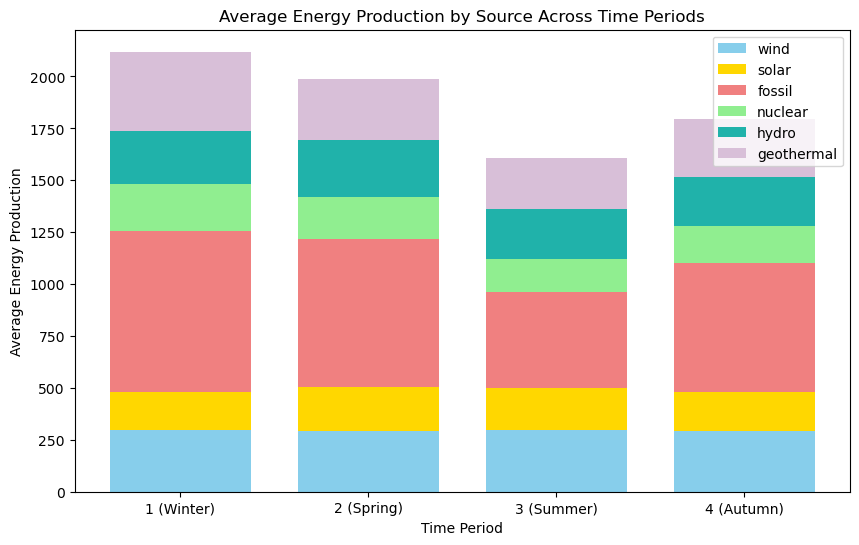

In [15]:
bar_width = 0.75
index = np.arange(len(time_periods))

# Initialize an array to store energy production for each energy source and time period
energy_by_source = np.zeros((len(model.e), len(time_periods)))

# Count the number of regions for normalization
num_regions = len(regions)

# Calculate energy production for each energy source and time period
for i, e in enumerate(model.e):
    for t in time_periods:
        for r in regions:
            energy_by_source[i, t - 1] += model.X[e, r, t]()

# Calculate average energy production for each energy source and time period
average_energy_by_source = energy_by_source / num_regions

# Define a custom color palette
colors = ['skyblue', 'gold', 'lightcoral', 'lightgreen', 'lightseagreen', 'thistle']

# Plot the stacked bar graph with the custom color palette
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(time_periods))

for i, e in enumerate(model.e):
    plt.bar(index, average_energy_by_source[i, :], width=bar_width, label=e, bottom=bottom, color=colors[i])
    bottom += average_energy_by_source[i, :]

plt.xlabel("Time Period")
plt.ylabel("Average Energy Production")
plt.title("Average Energy Production by Source Across Time Periods")
plt.xticks(index, ['1 (Winter)', '2 (Spring)', '3 (Summer)', '4 (Autumn)'])
plt.legend()
plt.show()

As we can see in the bar graph, it explains in the y-axis the average energy production in all the regions depending on the time period. As we can see there is any significant different between time periods but we can clearly see from the graph, that the renewable energies tend to be the most optimal to be produced, specially the solar. For this reason, the other energies such as nuclear or fossil, the model decided that was most optimal to produce less quantity.

From this graph we can conclude that the model took into consideration the enviromental impact constraint where it tries to do not surpass the environmetal limit meanwhile taking into account other aspects such as the cost or the availability in order to obtain an efficient sytem. It is also important to mention that there is a clear impact depending on the time period, where the average production of energy must be higher or lower depending on the season, where in winter the demand is the highest meanwhile in summer is the lowest.

We could also study another graphical ways to plot the information obtained after displaying the results of the model, for instance, a heat map could be a great idea in order to see the impact of each energy for each one of the 25 regions, in this way, we obtain in a simple way all the outputs (100) obtained from the model.

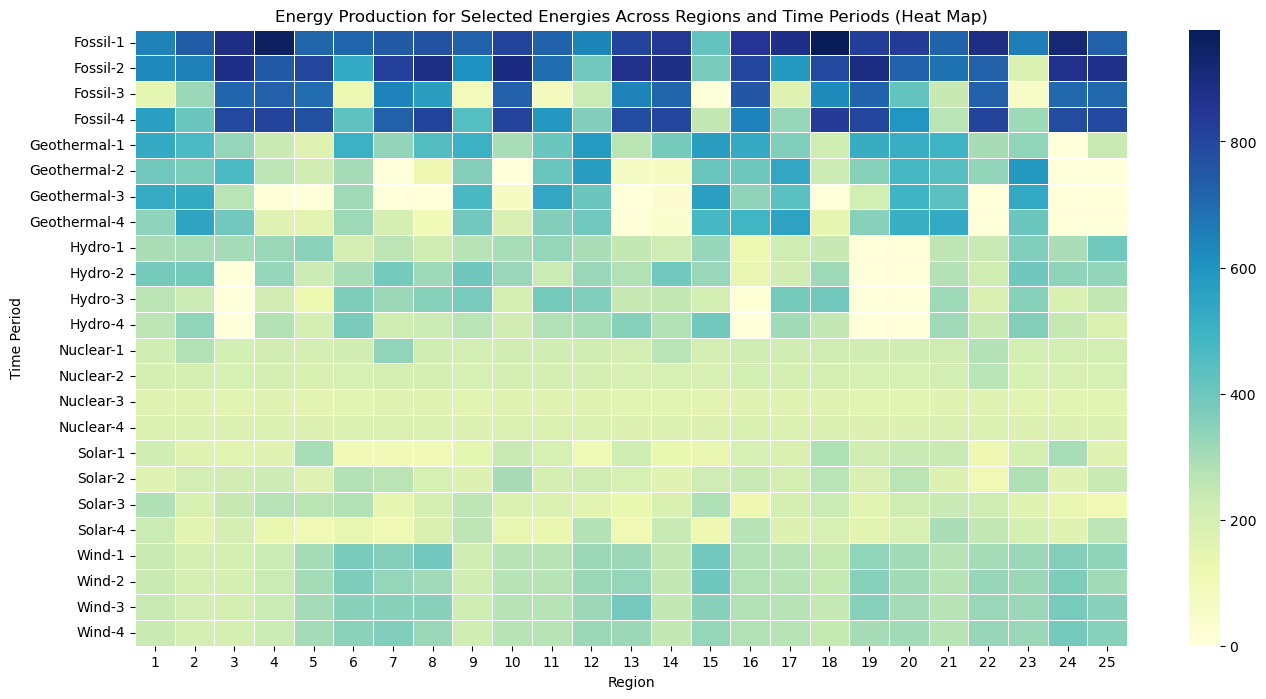

In [16]:
# Create a DataFrame for energy production values with regions and energy sources
energy_production_all_df = pd.DataFrame({
    'Wind': [model.X['wind', r, t]() for r in regions for t in time_periods],
    'Solar': [model.X['solar', r, t]() for r in regions for t in time_periods],
    'Fossil': [model.X['fossil', r, t]() for r in regions for t in time_periods],
    'Nuclear': [model.X['nuclear', r, t]() for r in regions for t in time_periods],
    'Hydro': [model.X['hydro', r, t]() for r in regions for t in time_periods],
    'Geothermal': [model.X['geothermal', r, t]() for r in regions for t in time_periods],
    'Region': np.repeat(regions, len(time_periods)),
    'Time Period': np.tile(time_periods, len(regions))
})

# Pivot the DataFrame for heatmap
heatmap_data_selected = energy_production_all_df.pivot_table(index='Region', columns='Time Period', values=['Wind', 'Solar', 'Fossil', 'Nuclear', 'Hydro', 'Geothermal'])

# Create a heat map using Seaborn
plt.figure(figsize=(16, 8))
heat_map_selected = sns.heatmap(data=heatmap_data_selected.T, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=.5)
plt.title("Energy Production for Selected Energies Across Regions and Time Periods (Heat Map)")
plt.xlabel('Region')
plt.ylabel('Time Period')
plt.show()



We can see in the heat map graph that depending on the intensity of the color, that region produces on total more or less energy, so by examining the heat map we can clearly understand which energies are more predominant in each region and at each time period, this is explained in the right of the graph where it shows the amount of energy produced depending on the color. 

In this heap map we can extract some interesting conclusions, for instance, we could start by looking at the nuclear energy, which is almost the same for every region, probably the reason is because is not an optimal energy to produce, but due to the constraint that the production of nuclear energy must be at least 10% of the total demand, the nuclear energy produced it is basically the 10% (which is the minimum required).
We can also see that the most used energy is the fossil fuel, probably because due to its availability eventhough it has a big environmental impact, but as long as the environmental treshold is not surpass, the most optimal way to produce energy is to use the fossil. 

There are other energies such as the solar that they are not producing more of that type of energy due to the limited availability, because in terms of cost and environmental impact, it is a pretty good energy. Once again, if we look at the time period, the production of energy varies (increasing or decreasing)

Overall, the heatmap provides an insightful and intuitive way to understand the distribution of energy production across regions and time periods for the different energy sources considered in your model.

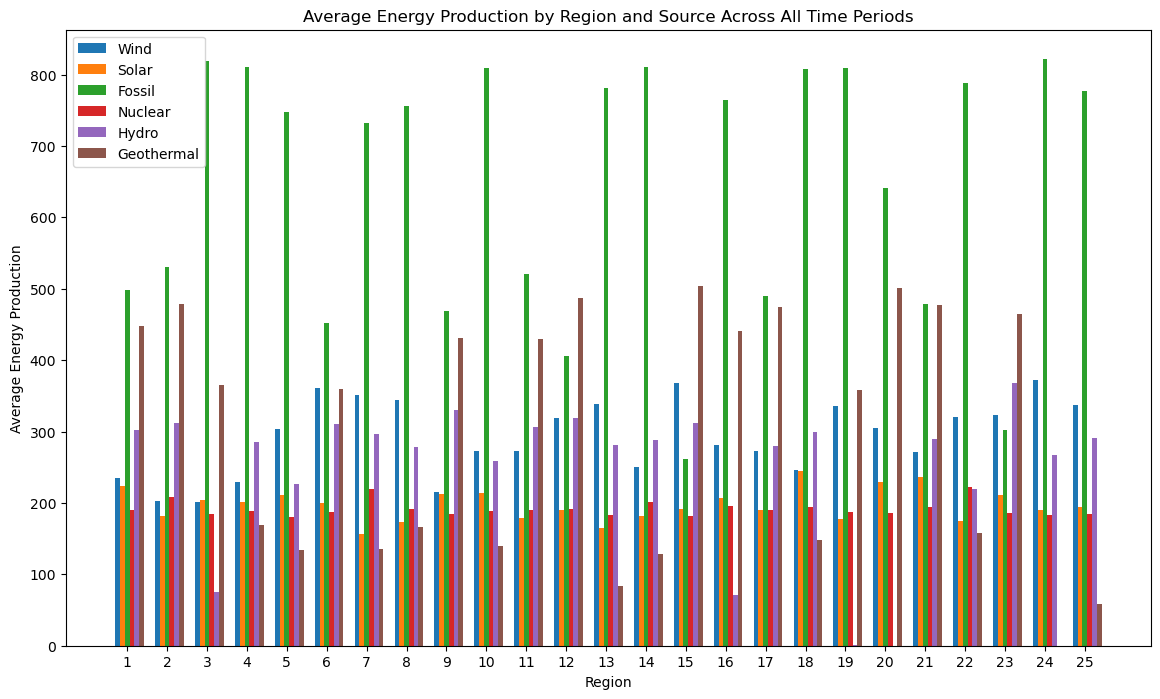

In [17]:

# Create a grouped bar plot
plt.figure(figsize=(14, 8))

bar_width = 0.12
bar_positions = np.arange(len(regions))

for i, energy_source in enumerate(['Wind', 'Solar', 'Fossil', 'Nuclear', 'Hydro', 'Geothermal']):
    plt.bar(bar_positions + i * bar_width, energy_production_all_df.groupby('Region')[energy_source].mean(),
            width=bar_width, label=energy_source)

plt.xlabel("Region")
plt.ylabel("Average Energy Production")
plt.title("Average Energy Production by Region and Source Across All Time Periods")
plt.xticks(bar_positions + 2 * bar_width, regions)
plt.legend()
plt.show()


From this bar graph we obtain similar conclusions to the previous graphs, however we can appreciate that it explains the average energy production for all the energies at each region, in this way we can see how any energy varies depending on the necessities such as demand, the availability of each type of energy, cost or environmetal impact in any specific region, we can see that the demand between regions varies but does not have any significant differences.

The main differences relies more on the energies that are produced (the cost of it, environmetal impact, availability, etc...), it is for this reason that depending on the region some of them have a huge production of fossil fuels such as region 14 meanwhile other regions have more balanced energy production systems like region 6, are different approaches in order to fulfill certain constraints and minizmizing the cost to produce energy, it is quite interesting to notice that in our data set are several possibilities that makes this type of results possible, where in some regions prefers to use mainly 2-3 energies but taking into consideration the constraints established meanwhile others due to the model considers a better idea to produce energy from different origins.

Another important insight is to notice that for almost all the regions, the two most favourite energies where at first, fossil fuel and second the geothermal, this makes sense due to the high availability of fossil energy and the low environmetal impact of the geothermal. Meanwhile, the nuclear energy we can see that in the most of the regions the production of this type of energy is the same because regions just want to satisfy the constraint of producing at least 10% of the total demand with nuclear power.

## 2.10) Interpret the results

Some of the most striking points could be that for the column for the energy wind, we can see that almost for any time period is always the same, this is a indicative that the wind energy is pretty good for the model due to its cost and environmental impact and it is for these reasons that the model always tries to use it as a first option until it reaches the availability for that power at that certain region and time period.

Futhermore, we can see that for the nuclear energy, always have a similar result eventhough its availability is quite higher, probably the model is just using the least amount of nuclear energy as possible to ensure the constraint related to the minimum nuclear power produced. 

Another interesting point is related to the fossil energy, which we can see it tends to be the most produced energy, probably due to its high availability that ensures the demand is satisfied.

Another energies that we can extract some conclusions could be the solar energy, which due to its low availability, cannot be used too much or the geothermal energy, which is interesting that the production of this energy is high but sometimes in specific regions and time periods, the production falls to cero, probably because the cost of this energy is quite variable, for some regions are cheap and for other quite high so it is not worth it to use it.

Talking about the objective value obtained, which was *5548058.136663086*, we cannot get any useful interpretation because it is necessary to compare with other models or apply benchmarks in order to know to what extend the model was able to minimize the objective function while fulfilling the constraints.

Thanks to the graphs plotted we saw that our first insights were true, for instance, the first option of the model was to use the cheapest energies such as wind or solar, and as the last option, the ones with the highest cost such as fossil fuels but those energies ensure the demand constraint.

From this insights we can see that the model tried to minimize the cost produced but due to the established constraints, had to use solutions that differs from what would be the most optimal model to minimize the objective function. We can clearly see that the model tried to use as the first option the most cheaper energies which those energies at the same time were the ones with the lowest environmetal impact but due to some limitations which mainly was the availability factor, the model had to chose other not-so-optimal energies that could worse the result.



# 3) Sensitivities associated with each constraint

Sensitivity refers to the ability to assess how the optimal solution of a model changes with variations in the model parameters, such as cost coefficients, environmetal limits, or availability. In other words, it involves understanding how robust the optimal solution is in response to changes data used in the problem. Sensitivity can be analyzed through sensitivity analysis by using duals, which involves evaluating how the optimal solution or the values of decision variables change when model parameters are modified.

## 3.1) Computing the sensitivity

The sensitivities associated with each constraint, provide insights into how the optimal objective function value would be affected depending on the change of parameters and constraints.

Positive dual values indicate that an increase in a constraint related to a parameter (for instance: demand or availability) will lead to an increase in the objective function, and then in the objective value. Negative dual values suggest that an increase in the parameter will lead to a decrease in the objective value. 

By using duals we can compute the sensitivity associated to each constraint:

In [18]:
# Creating a dual
model.dual= Suffix(direction=Suffix.IMPORT)

solver.solve(model)

model.dual.display()

dual : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key                                      : Value
         availability_constraint[fossil,1,1] :               0.0
         availability_constraint[fossil,1,2] :               0.0
         availability_constraint[fossil,1,3] :               0.0
         availability_constraint[fossil,1,4] :               0.0
        availability_constraint[fossil,10,1] :              -2.0
        availability_constraint[fossil,10,2] :               0.0
        availability_constraint[fossil,10,3] :               0.0
        availability_constraint[fossil,10,4] :               0.0
        availability_constraint[fossil,11,1] :               0.0
        availability_constraint[fossil,11,2] :               0.0
        availability_constraint[fossil,11,3] :               0.0
        availability_constraint[fossil,11,4] :               0.0
        availability_constraint[fossil,12,1] :               0.0
        availability_constraint[fossil,12,2] :  

A more visually appealing way to present the results obtain from the dual.

In [19]:

# Displaying dual values
print("\nDual Values:")
for r in model.r:
    for t in model.t:
        print(f"\nRegion {r}, Time {t}:")
        print("   Demand Constraint Sensitivity:", model.dual[model.demand_constraint[r, t]])
        
        # Use the availability_constraint for each energy source
        for e in model.e:
            print(f"   {e.capitalize()} Availability Constraint Sensitivity:", model.dual[model.availability_constraint[e, r, t]])
        
        print("   Minimum Nuclear Production Constraint Sensitivity:", model.dual[model.min_nuclear_constraint[r, t]])
        print("   Minimum Renewable Production Constraint Sensitivity:", model.dual[model.min_renewable_constraint[r, t]])
        print("   Environmental Constraint Sensitivity:", model.dual[model.environmental_constraint[r, t]])




Dual Values:

Region 1, Time 1:
   Demand Constraint Sensitivity: 37.0
   Wind Availability Constraint Sensitivity: 0.0
   Solar Availability Constraint Sensitivity: -13.0
   Fossil Availability Constraint Sensitivity: 0.0
   Nuclear Availability Constraint Sensitivity: 0.0
   Hydro Availability Constraint Sensitivity: -10.0
   Geothermal Availability Constraint Sensitivity: -9.0
   Minimum Nuclear Production Constraint Sensitivity: 11.0
   Minimum Renewable Production Constraint Sensitivity: 0.0
   Environmental Constraint Sensitivity: -65.675354569385

Region 1, Time 2:
   Demand Constraint Sensitivity: 37.0
   Wind Availability Constraint Sensitivity: 0.0
   Solar Availability Constraint Sensitivity: -13.0
   Fossil Availability Constraint Sensitivity: 0.0
   Nuclear Availability Constraint Sensitivity: 0.0
   Hydro Availability Constraint Sensitivity: -10.0
   Geothermal Availability Constraint Sensitivity: -9.0
   Minimum Nuclear Production Constraint Sensitivity: 11.0
   Minimum

## 3.2) Interpretation of the results

We can interpret each of the sensitivities associated to each constraint in order to understand which impact does that constraint has at the moment of solving the model, as it can be expected, those constraints are related to parameters which are the ones with the true impact, the mix of constraints and parameters gives us the sensitivity in each constraint established.

If we start talking demand constraint, we can see that the sensitivity for this constraint is around 25 and 55, this implies that there is a linear relationship between an increase in the demand constraint and an increase in the objective function. So, if there is a increase in the demand parameter by one unit, it would imply an increase in the objective function between 25 and 55 (the value would be according in this case, depending on the region and time period sensitivities). So we could say the model has a moderate sensitivity to an increase in the parameter demand.

Continuing with the sensitivity for the minimum nuclear energy production constraint, the values that it takes are around 0 and 30, so we can see that for some decision variables, this constraint does not have any impact meanwhile in other ones it has a moderate impact. This implies that for instance, a decision variable which sensitivity with this constraint is 0, implies that an increase in the required minimum nuclear energy production will have no impact on the objective function, meanwhile for others with a positive number in this sensitivity, would imply an increase of the objective function, as it can be expected, this means that the model would obtain a worse result because the optimal solution without constraints would be to chose the most cheap energies as possible. This makes sense because in the visual representation we saw that the model solution was to produce in most of the cases only the 10% of the total demand as nuclear power to satisfy the constraint, so this makes sense that if we increase the requirement for nuclear energy production (for instace, from a 10% to a 20%), the objective function will increase, but we are interested in decreasing it.

Refering to the sensitivity of the minimum production of renewable energies, we can see that almost every decision about this constraint is zero, so this indicates that with the current data, a change in this constraint will not make any significant difference, this does not means that this constraint is useless, it means that with the current data set and the characteristics of the problem, a change on the minimum requirement for renewable energies will not have any impact, but maybe if we change the data or the parameters, this could completely change. Probably in our case this constraint has zero sensitivity because the model even without this constraint is already using a high percentage of renewable energies to minimize the objective function, because we can see that some renewable energies are quite cheap.

Talking about the enviromental limit constraint, we can see that its sensitivity its quite higher compared to any other constraint sensitivity, where some of this sensitivity constraint are zero but the majority are between -50 and -190, this obviusly implies that if we increase the environmetal limit (as we can see its the limit established in that constraint) the objective function would decrease in a very significant way, in this case, a reduction between -50 and -190 depending on the case, so we can extract from this information that this constraint has a huge impact on the model, however, as we mentioned during this assigment, we were interested in limiting the enviromental impact in order to see how the model tries to find the most optimal solution.

Finally, the sensitivity for the availability constraint depending on the energy has zero value like the nuclear energy or negative values, for instance for the solar or wind energies. This is a clear indicative that there is a linear relation between the availability of each energy and the impact on decreasing the objective function. For some energies we can see that there is a significant sensitivity because the model would be able to decrease the objective function if we increase its availability, this makes sense taking into consideration that energies such as the solar has a low availability compared to other energies. Meanwhile energies that have a high availability such as fossil fuels, a change in the availability with respect to that energy would not imply a significant change in the objective function.

To sum up, the sensitivity is a good indicator on to what extend a certain constraint associated with certain parameters is having a significant impact on the final model or not, in our case, some constraints such as the environmetal limit constraint which depends on the enviromental limit, has a big impact on the model, where if we increase the enviromental limit, the model would be able to decrease the objective function because they can be more relaxed about which energy has a higher or lower environmetal impact. But there are others such as the demand constraint that in the case we increase the demand parameter, would imply an increase in the demand and for that reason, an increase in the energy production required that would end up in increasing the objective function, almost the same as the availability for certain energies. There are other constraints that in the context of the current data set and situation, does not have a significant impact, but maybe in a different situation they would have, for instance, if we decreased the availability for the fossil, the availability for this energy imply a increase in the objective function.


# 4) Discrete modelling

## 4.1) Introduction





In response to the ever-growing concerns about environmental sustainability and the need for efficient energy planning, the government of a forward-thinking country has embarked on a journey to revolutionize its energy sector. Recognizing the intricate balance between minimizing environmental impact, meeting energy demands, and ensuring operational feasibility, the government initially formulated a continuous optimization model. This initial model, with its emphasis on minimizing costs and adhering to strict environmental constraints, laid a robust foundation for sustainable energy planning.

Building upon the success of the continuous model, the government has now taken a bold step forward by introducing a discrete optimization model. This evolution is motivated by a desire to infuse more nuanced decision-making into the energy production landscape. The introduction of binary variables and a penalty parameter represents a paradigm shift, allowing decision-makers to navigate a complex interplay of cost efficiency, environmental impact, and strategic energy source selection.

The discrete model inherits the environmental constraints from its continuous predecessor, ensuring that the environmental impact remains a critical consideration. However, what sets this model apart is the incorporation of binary decision variables, such as the constraints enforcing mutual exclusivity which the main reason is to effectively use the limited amount of space in each region. Futhermore, goverment wants to limit the sources of production of energy, for this reason they are specifying a minimum and maximum sources where energy can be produced, that must be between 3 and 5, this involves a challenge, particularly the maximum of possible sources of production because in the continuous section, most of the times optimal solution was to use every source of energy. 
These additions enable the government to impose logical and operational constraints, reflecting real-world scenarios and necessities where energy production decisions are multifaceted and contingent on various factors that suppose a challenge at the practice.

Furthermore, by relaxing the environmental limit in tandem with the number of energies used—limited to a maximum of five—the government seeks a balanced approach. The new model aims to strike a harmonious chord between minimizing costs, meeting energy demands, and responding to environmental imperatives. This evolution in the optimization model signifies a commitment to adaptability and responsiveness to the dynamic challenges faced by the energy sector, ultimately fostering a more resilient and sustainable future.


In [20]:
#Treshold for the enviromental impact limit in the whole country
total_env_limit = 2000
# Treshold for the environmental impact limit per region
environmental_limit = total_env_limit/25 #  total environmetal limit for the whole country divided by each region


## 4.2) Define new model

### 4.2.1) Reuse the continuous model

Before starting defining our new model, let's take only the things that we want to reuse from the previous one. <br>

In [21]:
########  Create Pyomo model  ########
model = ConcreteModel()


########  Initialize SETS  ########

regions = list(range(1, num_regions + 1))
time_periods = list(range(1, num_time_periods + 1))
energies = ["wind", "solar","fossil", "nuclear","hydro","geothermal"]

model.e = Set(initialize = energies, doc = 'energies')
model.r = Set(initialize = regions, doc = 'regions')
model.t = Set(initialize = time_periods, doc = 'time')



########  Declare PARAMETERS  ########
model.d  = Param(model.r, model.t, within=PositiveReals,
                 initialize=lambda model, r, t: sample_dataset[0]["demand"][r - 1, t - 1], mutable=True)

model.A = Param(model.e, model.r, model.t, within=NonNegativeReals,
                initialize=lambda model, e, r, t: sample_dataset[1][e][r - 1, t - 1], mutable=True)

model.E = Param(model.e, model.r, within=NonNegativeReals,
                initialize=lambda model, e
                , r: sample_dataset[2][e][r - 1], mutable=True)

model.C = Param(model.e, model.r, within=NonNegativeReals,
                initialize=lambda model, e, r: sample_dataset[3][e][r - 1], mutable=True)





For this discrete case, we are going to add a new parameter which is going to be a penalization parameter for using an energy, $P_{e}$. The goverment of the country has noticed due to several studies that some energies has a brigther future than others, for this reason, they are interested in adding a penalization for using a certain energy depending on how profitable and efficient they will be in the future, among other factors. 

For instance, the fossil energy prediction is awful, the planet is running out of fossil fuel reserves and probably in the near future, this type of energy will practically dissapear. On the other hand, several studies has confirmed that energies like the nuclear energy will have a promising future, the technological advances in order to obtain essential materials to produce this energy such as uranium are advancing and making this task much easier than years ago, also it produces a huge amount of energy and the enviromental impact should not be too high because the potential environmetal risk is in the case this radiactive materials gets into air. For this reasons, the goverment considered that nuclear energy is quite promising due to its potential massive production without requiring many space (nuclear centrals) and developing thanks to science advances.

Other energies such as solar or wind energies are good energies but will face some problems in the future because they need a huge space to allocate all that wind turbines and solar pannels respectively, this is a significant problem taken into consideration the current and future need for space to construct. Furthermore this type of energies depends on the climatological factors, so they do not guarantee always a efficient production of energy.

Talking about the hydro and geothermal energies, they share some important problems such as the dependency of geographical areas, because these type of energies cannot be produced in any place. Furthermore the risk of safety of infrastructures, such as dams in hydroelectric projects or geothermal facilities, can be a concern where ther can be potential risks of structural failure that could have serious consequences, but it is true that this possibility thanks to the advance of technology are practically imposible. 

For all these reasons, the goverment has established the following penalty paremeters for using certain energies:
 Penalty = [1100, 50,2000, 10,430,750] where each element represents the penalization for the use of that respective energy. This penalty parameter was defined in the data set at the beginning.

In [22]:
model.P = Param(model.e, within=NonNegativeReals,
                initialize=lambda model, e: sample_dataset[4][e], mutable=True)


In [23]:
########  Define our CONTINUOUS DECISION VARIABLES  ########
model.X = Var(model.e, model.r, model.t, within=NonNegativeReals)

### 4.2.2)  Define new variables

Now, we are going to define some binary variables:

$Y_{e,r,t}$: which indicates whether energy *e* is chosen in region *r* at time *t*.

In [24]:
# New binary decision variables
model.Y = Var(model.e, model.r, model.t, within=Binary)


##  4.3) Objective Function

The new objective function is a combination of two terms:
- Original objective function: The original objective function encapsulates the inherent costs linked to energy production through continuous variables. This component quantifies the financial implications associated with the utilization of various energy sources.
- A penalty expression: The penalty expression introduces a corrective measure to discourage the activation of binary variables in the optimization process. The magnitude of this penalty is contingent upon the product of the binary variable, denoted as model.$Y_{e,r,t}$, and the associated penalty parameter, denoted as $P_{e}$. The penalty term is appended to the overall objective to account for the binary decision variables.

The overarching aim of the optimization process is to minimize this combined objective. By doing so, the optimization process endeavors to strike a harmonious equilibrium between minimizing the original cost incurred during energy production and imposing penalties for the activation of binary variables. This dual consideration reflects a nuanced approach that seeks to optimize the system while respecting the binary constraints imposed on the decision variables.

\begin{align}
min \sum_{e\ \in \ energies}\sum_{r=1}^{25}\sum_{t=1}^4 ( C_{e,r}*X_{e,r,t}  +  P_{e}*Y_{e,r,t})
\end{align}

In [25]:
# Objective function
model.obj = Objective(
    expr=sum(
        model.C[e,r] * model.X[e,r,t]
        for e in model.e for r in model.r for t in model.t
    ) 
    + sum((model.Y[e,r,t] * model.P[e]) for e in model.e for r in model.r for t in model.t ),
    sense=minimize,
)

## 4.4) Constraints

### 4.4.1) Old constraints
In the incorporation of binary variables into the new optimization model, it is imperative to address existing constraints. The integration of binary decisions alters the system dynamics, necessitating a reassessment of previous constraints. Maintaining coherence ensures the preservation of essential relationships and prevents inadvertent oversights that may compromise the model's accuracy and reliability. Incorporating both old and new constraints is fundamental for a comprehensive and well-aligned optimization framework.

In [26]:
########  DEMAND CONSTRAINT  ########

# The production of energy must be at least equal or greater to the demand for a certain region and time period
def demand_constraint(model, r, t):
    # The production of all the energies must be at least equal to the demand for the region in that period of time
    value = sum(model.X[e, r, t] for e in model.e)
    return value >= model.d[r, t]

model.demand_constraint = Constraint(model.r, model.t, rule=demand_constraint)



########  AVAILABILITY CONSTRAINT  ########

# The production of energy must be less or equal to the availability of the energy at any region and time period
def availability_constraint(model,e,r,t):
    return model.X[e,r, t] <= model.A[e,r, t]

model.availability_constraint = Constraint(model.e, model.r, model.t, rule = availability_constraint)



########  ENVIRONMENTAL IMPACT CONSTRAINT  ########

# Ensure that the ecological impact from the production of energy does not surpass the limit established.
def environmental_constraint(model, r, t):
    # The summatory of the product between the environmental impact for each energy and the production of 
    # that energy must be at most equal to the environmental limit established by the government
    #value = sum([model.E[e, r] * model.X[e, r, t] for e in model.e])
    
    value = model.E["wind", r] * model.X["wind", r, t] 
    + model.E["solar", r] * model.X["solar", r, t]  
    + model.E["fossil", r] * model.X["fossil", r, t]
    + model.E["nuclear", r] * model.X["nuclear", r, t]  
    + model.E["hydro", r] * model.X["hydro", r, t]  
    + model.E["geothermal", r] * model.X["geothermal", r, t]
    return value <= environmental_limit

model.environmental_constraint = Constraint(model.r, model.t, rule=environmental_constraint)



########  MINIMUM RENEWABLE ENERGIES PRODUCTION CONSTRAINT  ########

def min_renewable_constraint(model,r,t):
    value =  model.X["wind",r, t] +  model.X["solar",r, t]  + model.X["hydro",r, t] + model.X["geothermal",r, t]
    return value >= 0.2 * model.d[r,t]

model.min_renewable_constraint = Constraint(model.r, model.t, rule = min_renewable_constraint)

### 4.4.2) New constraints

**1) energy_selection_constraint:** <br> By using this constraint, you ensure that the continuous decision variable associated with each energy type, $X_{e,r,t}$  is activated only when the corresponding binary variable, $Y_{e,r,t}$  is set to 1 (indicating that the corresponding energy type is selected). In this case, $X_{e,r,t}$ is able to take any value since M is very large. <br>On the other hand, it is effectively deactivated (constrained to 0) when the binary variable is 0. Applying the "Big-M" method allows to linearize the relationship between binary and continuous variables in optimization problems. <br>


<br>
\begin{align}
X_{e,r,t} ≤ M * Y_{e, r,t}  \qquad        {e\ \in \ energies},  {r\ \in \ regions},  {t\ \in \ time periods}
\end{align}
<br>

In [27]:
# Value M which we make sure it is going to be bigger than any variable.
M = 1000000000

def energy_selection_constraint(model,e, r, t):
    return model.X[e,r, t] <= M * model.Y[e, r, t]

# Apply the energy_constraint
model.energy_selection_constraint = Constraint(model.e, model.r, model.t, rule=energy_selection_constraint)



**2) max_energies_constraint:** <br> 
   The objective of this constraint is to limit, for each region *r* and at any time *t*, the usage of at most 5 types of energy as we saw in the continuous case that the energy was quite splitted and used in a diverse way. By summing the binary variables $Y_{e,r,t}$ for each energy source *e*, within a specific region and time period, the constraint ensures that the count does not exceed a specified threshold, in this case, 5. This constraint reflects a strategic choice to control and optimize the diversity of energy sources utilized, contributing to the model's adaptability and adherence to predefined limitations in the overall energy production system. <br>
   
   \begin{align}
\sum_{e\ \in \ energies}(Y_{e,r,t}) ≤ 5,  \qquad        {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}

In [28]:
def max_energies_constraint(model,r,t):
    # Select only one energy source for production in each region and time period
    return sum(model.Y[e, r, t] for e in model.e) <= 5

model.max_energies_constraint = Constraint(model.r, model.t, rule=max_energies_constraint)

An essential consideration in the implementation of the "max_energies_constraint" is the careful determination of the threshold based on the characteristics of the specific dataset being utilized. The significance of this lies in the fact that setting a threshold too restrictively, indicating a preference for fewer types of energies, must align with the actual availability of these energy sources. When the threshold is overly stringent, demanding the use of fewer energy types despite insufficient availability to meet the demand under the established constraints, it can result in an infeasible solution. Therefore, the selection of the threshold in the "max_energies_constraint" should be tailored to the dataset's unique properties, striking a balance that ensures both feasibility and adherence to the broader optimization goals.

**3) min_energies_constraint:** <br>
    The objective of this constraint is to limit, for each region *r* and at any time *t*, the usage of at least 3 types of energy. <br>
    Establishing a lower limit in the optimization model, is crucial for reflecting real-world scenarios where a minimum diversity in energy sources is essential. In practical energy systems, relying on a diverse set of energy sources enhances resilience, mitigates risk, and ensures a more sustainable and flexible infrastructure.
    

 
   \begin{align}
\sum_{e\ \in \ energies}(Y_{e,r,t}) ≥ 3,  \qquad        {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}

In [29]:
def min_energies_constraint(model,r,t):
    # Select only one energy source for production in each region and time period
    return sum(model.Y[e, r, t] for e in model.e) >= 3

model.min_energies_constraint = Constraint(model.r, model.t, rule=min_energies_constraint)

**4) Mutual exclusivity constraint:** <br>

The goverment has imposed another restriction related to some renewable energies, where they want to focus on only a few instead of producing from different sources that implies a big amount of space in order to be efficient, so they are mainly worried on the solar and wind energies. For this reason, they want that between those two energies, at maximum 1 of them can be produced for a certain region and period. In this way, they can ensure enough space to construct houses and factories and they can save that space to use either solar or wind energy. The model will need to chose between the high penalty of the wind energy or the low availability of the solar energy so we consider that could give us interesting results.

 
\begin{align}
\sum_{ws\ \in \ WindSolar}(Y_{wg,r,t}) ≤ 1,  \qquad        {WindSolar\ =  ["Wind","Solar"]},\ {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}

In [30]:
# Mutual exclusivity between wind and solar
def mutual_exclusivity(model, r, t):
    return model.Y['wind', r, t] + model.Y['solar', r, t] <= 1

model.mutual_exclusivity_wind_solar_constraint = Constraint(model.r, model.t, rule=mutual_exclusivity)

**5) Minimum nuclear energy production:** <br>

As in the first part, the goverment wants a minimum of nuclear energy production, but in this case, because we must have 5 or less sources of energy and at least 3, the goverment has decresed the percentage of the total demand to 7.5% only when the nuclear energy is chose between the 6 energies to be produced. In the case the nuclear energy is not choosen, there is not a minimum production requirement.

\begin{align}
X_{nuclear,r,t} ≥ 0.075 * d_{r,t},  \qquad \ only \ and \ only \ if \  Y_{nuclear,r,t} = 1    \\    {r\ \in \ regions}, {t\ \in \ time periods}
\end{align}
<br>

In [31]:
def min_nuclear_production(model, r, t):
    min_nuclear_percentage = 0.075 
    return sum(model.X['nuclear', r, t] for r in model.r for t in model.t) >= min_nuclear_percentage * sum(model.d[r, t] for r in model.r for t in model.t) * model.Y['nuclear', r, t]

model.min_nuclear_production_constraint = Constraint(model.r, model.t, rule=min_nuclear_production)


## 4.5) Solve the model

In [32]:
# Solve the updated model
solver = SolverFactory('glpk')
solver.solve(model)

# Print objective value to compare with the previous part
print("Objective Value:", value(model.obj()))
# Display the results
model.display()

Objective Value: 5951725.212945889
Model unknown

  Variables:
    X : Size=600, Index=X_index
        Key                   : Lower : Value                : Upper : Fixed : Stale : Domain
             ('fossil', 1, 1) :     0 :     911.032565775973 :  None : False : False : NonNegativeReals
             ('fossil', 1, 2) :     0 :     917.546832317204 :  None : False : False : NonNegativeReals
             ('fossil', 1, 3) :     0 :     462.192280402877 :  None : False : False : NonNegativeReals
             ('fossil', 1, 4) :     0 :     867.866792094139 :  None : False : False : NonNegativeReals
             ('fossil', 2, 1) :     0 :     738.204768643991 :  None : False : False : NonNegativeReals
             ('fossil', 2, 2) :     0 :     873.668700328543 :  None : False : False : NonNegativeReals
             ('fossil', 2, 3) :     0 :                  0.0 :  None : False : False : NonNegativeReals
             ('fossil', 2, 4) :     0 :     622.775276088328 :  None : False : Fals

In [33]:
# Display results
print("Objective Value:", round(value(model.obj()), 3))
print("\nDecision Variables:")
for i in model.r:
    for j in model.t:
        print(
            f"Region {i}, Time Period {j}: "
            f"Wind={value(model.Y['wind', i, j])}, "
            f"Solar={value(model.Y['solar', i, j])}, "
            f"Fossil={value(model.Y['fossil', i, j])}, "
            f"Nuclear={value(model.Y['nuclear', i, j])}, "
            f"Hydro={value(model.Y['hydro', i, j])}, "
            f"Geothermal={value(model.Y['geothermal', i, j])}"
        )


Objective Value: 5951725.213

Decision Variables:
Region 1, Time Period 1: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=1.0, Hydro=1.0, Geothermal=1.0
Region 1, Time Period 2: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=0.0, Hydro=1.0, Geothermal=1.0
Region 1, Time Period 3: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=0.0, Hydro=1.0, Geothermal=1.0
Region 1, Time Period 4: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=0.0, Hydro=1.0, Geothermal=1.0
Region 2, Time Period 1: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=1.0, Hydro=1.0, Geothermal=1.0
Region 2, Time Period 2: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=1.0, Hydro=1.0, Geothermal=1.0
Region 2, Time Period 3: Wind=1.0, Solar=0.0, Fossil=0.0, Nuclear=1.0, Hydro=1.0, Geothermal=1.0
Region 2, Time Period 4: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=0.0, Hydro=1.0, Geothermal=1.0
Region 3, Time Period 1: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=1.0, Hydro=1.0, Geothermal=1.0
Region 3, Time Period 2: Wind=1.0, Solar=0.0, Fossil=1.0, Nuclear=0.0, Hydro=

In [34]:


print("\nDecision Variables:")
for i in model.r:
    for j in model.t:
        print(
            f"Region {i}, Time Period {j}: "
            f"Wind={round(value(model.X['wind', i, j]), 3)}, "
            f"Solar={round(value(model.X['solar', i, j]), 3)}, "
            f"Fossil={round(value(model.X['fossil', i, j]), 3)}, "
            f"Nuclear={round(value(model.X['nuclear', i, j]), 3)}, "
            f"Hydro={round(value(model.X['hydro', i, j]), 3)}, "
            f"Geothermal={round(value(model.X['geothermal', i, j]), 3)}"
        )



Decision Variables:
Region 1, Time Period 1: Wind=344.026, Solar=0.0, Fossil=911.033, Nuclear=57.191, Hydro=293.871, Geothermal=531.88
Region 1, Time Period 2: Wind=308.373, Solar=0.0, Fossil=917.547, Nuclear=0.0, Hydro=385.084, Geothermal=392.996
Region 1, Time Period 3: Wind=371.233, Solar=0.0, Fossil=462.192, Nuclear=0.0, Hydro=266.158, Geothermal=523.416
Region 1, Time Period 4: Wind=342.786, Solar=0.0, Fossil=867.867, Nuclear=0.0, Hydro=260.988, Geothermal=342.358
Region 2, Time Period 1: Wind=324.177, Solar=0.0, Fossil=738.205, Nuclear=330.126, Hydro=296.845, Geothermal=467.648
Region 2, Time Period 2: Wind=324.177, Solar=0.0, Fossil=873.669, Nuclear=67.388, Hydro=384.981, Geothermal=371.785
Region 2, Time Period 3: Wind=324.177, Solar=0.0, Fossil=0.0, Nuclear=556.147, Hydro=229.018, Geothermal=527.658
Region 2, Time Period 4: Wind=324.177, Solar=0.0, Fossil=622.775, Nuclear=0.0, Hydro=336.031, Geothermal=547.017
Region 3, Time Period 1: Wind=322.363, Solar=0.0, Fossil=885.439, 

The incorporation of both continuous variables (X) and binary variables (Y) into the energy production model introduces a level of intricacy that significantly impacts its optimization dynamics. The presence of two parameters, namely the cost parameter and penalties associated with binary variables, amplifies the model's complexity. This complexity is further accentuated by the existence of multiple optimal solutions, creating a challenging landscape for the solver to navigate. Notably, the interplay between the cost parameter and penalties unveils a subtle contradiction, particularly evident in the case of nuclear energy. While the cost parameter tends to drive nuclear values towards zero due to its higher associated cost, the introduction of penalties for nuclear energy with the rest of the energies introduces a counterbalancing effect. This equilibrium poses a considerable challenge, potentially impeding the solver's ability to converge efficiently, highlighting the intricate nature of optimizing a multi-parameter energy production model. Furthermore, we can see other new added constraints like the exclusitivity constraint which ensures the selection between the solar and the wind energy, also having the first one a high penalty parameter compared to the solar one that has a low availability but also a low penalty parameter.

## 4.5) Visual representation

As we did before, lets compute asome grapsh in order to see the impact after including binary variables compared to the previous model that only uses continuous variables.

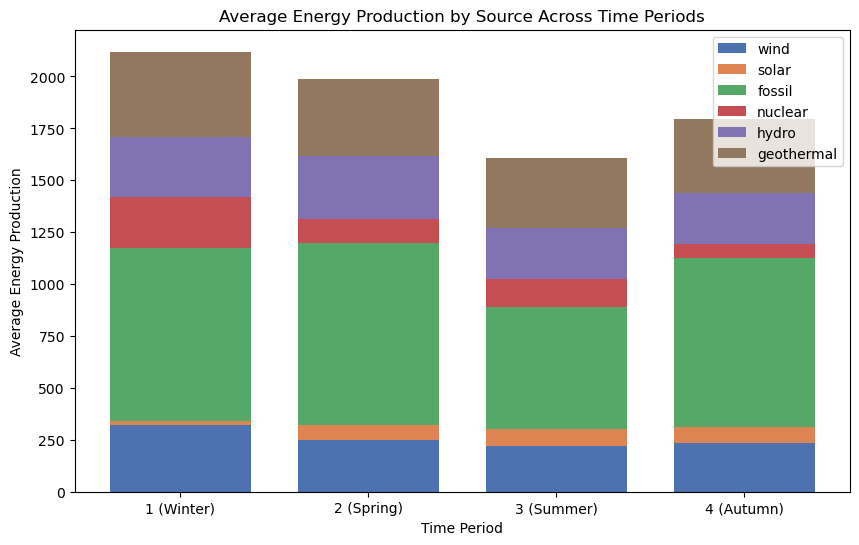

In [35]:

bar_width = 0.75
index = np.arange(len(time_periods))

# Initialize an array to store energy production for each energy source and time period
energy_by_source = np.zeros((len(model.e), len(time_periods)))

# Count the number of regions for normalization
num_regions = len(regions)

# Calculate energy production for each energy source and time period
for i, e in enumerate(model.e):
    for t in time_periods:
        for r in regions:
            energy_by_source[i, t - 1] += model.X[e, r, t]()

# Calculate average energy production for each energy source and time period
average_energy_by_source = energy_by_source / num_regions



# Plot the stacked bar graph 
colors = sns.color_palette('deep')
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(time_periods))

for i, e in enumerate(model.e):
    plt.bar(index, average_energy_by_source[i, :], width=bar_width, label=e, bottom=bottom, color = colors[i])
    bottom += average_energy_by_source[i, :]

plt.xlabel("Time Period")
plt.ylabel("Average Energy Production")
plt.title("Average Energy Production by Source Across Time Periods")
plt.xticks(index, ['1 (Winter)', '2 (Spring)', '3 (Summer)', '4 (Autumn)'])
plt.legend()
plt.show()


An insightful analysis of the model's outcomes reveals a distinct pattern in the selection of nuclear energy, which tends to be less frequently chosen compared to other sources. The exploration of the "Average Energy Production by Source Across Time Periods" through a bar chart provides valuable insights. While nuclear energy maintains a generally lower profile, a notable surge is observed during winter periods. Intriguingly, nuclear energy surpasses solar during these colder months. This anomalous behavior suggests a strategic utilization of nuclear energy in response to heightened energy demands during winter. The hypothesis is substantiated by the reasoning that nuclear energy is selectively employed when necessary, aligning with increased energy requirements prompted by the combination of heating requirements, reduced natural lighting, and seasonal activities. This observation sheds light on the dynamic nature of energy source selection, emphasizing the model's capacity to capture nuanced patterns in response to varying demand scenarios across different time periods.

From the graph that is quite useful in order to understand the differences between using this discrete variables and constraints compared to the previous section, aspects such as the exclusive production of energy between the solar and the wind energy where we can see that due to the low availability of the solar energy, in seasons like winter there is a necessity of using the wind energy, but in other reasons where the demand is not too high like summer or autumn, we can see that there is a higher competition at the moment of selection the wind or the solar energy that probably makes harder for the model to chose between those two.

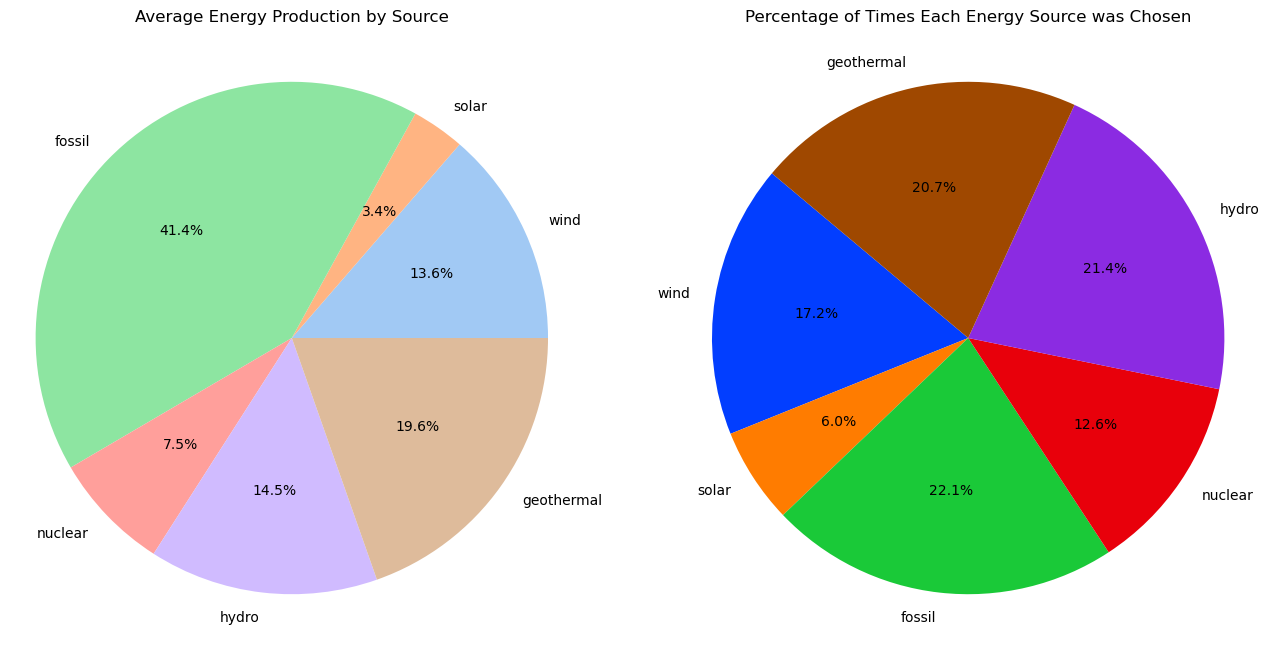

In [36]:
# Plot two pie charts
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# First pie chart: Average Energy Production by Source
total_energy_by_source = np.sum(average_energy_by_source, axis=1)
axs[0].pie(total_energy_by_source, labels=model.e, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axs[0].axis('equal')
axs[0].set_title("Average Energy Production by Source")

# Second pie chart: Percentage of Times Each Energy Source was Chosen
total_regions_times = len(regions) * len(time_periods)
y_values = np.array([[model.Y[e, r, t]() for t in time_periods for r in regions] for e in model.e])
selected_times_by_source = np.sum(y_values, axis=1)
percentage_by_source = selected_times_by_source / total_regions_times * 100
axs[1].pie(percentage_by_source, labels=model.e, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright'))
axs[1].axis('equal')
axs[1].set_title("Percentage of Times Each Energy Source was Chosen")

plt.show()


We could also use a pie chart in order to understand the total impact of each energy. It is possible to see that the most common energy for production is the fossil with a 41%, this could be expected from the beginning due to its high availability, that in order to only fulfill the demand constraint, this energy must be highly produced. After the fossil fuel, we can see a balance between the geothermal, hydro and wind energies, which the three of them are around the 10-20% of the total production, probably the wind energy has a smaller percentage due to its high penalty parameter and not so high availability compared to the hydro and geothermal energies. Furthermore, from the nuclear we can see that compose the 7.5%, which makes absolute sense taking into consideration that is the minimum requirement imposed by the goverment. Finally, the solar energy which in this discrete case is the lowest one, eventhough it has a very low penalty parameter, the constraint that ensures a exclusivity between solar and wind energies made the solar energy to drop significantly. 

We also plotted another pie chart in order to understand how many times a source of energy was chosen, where we can see in this case it is distributed in a more balanced way, this is because in this case as it is a discrete case, for instance the percentage of choosing fossil and at the same time choosing hydro can be almost equal because those two energies are commonly used. However, we can notice that the tendency is to follow the same logical positions as in the other chart, where the fossil is the most commonly used, but in this case, it is more common to use hydro energy compared to the geothermal eventhough we can see in the first graph the production of geothermal is bigger compared to the production of hydro energy, this is probably due to the availability of each energy and the penalty parameter, where we think it is probable that the model prefers to assume the penalization of the hydro geothermal only when it is to produce a high amount of energy compared to the hydro which penalty parameter is lower, so it is better in order to minimize the objective function. After these energies we can see there is the wind energy which makes sense, and after the nuclear energy, which has a higher percentage of been selected than the solar, probably because the solar can only be used if we do not produce any wind energy (and viceversa).

We can see important changes compared to the previous only-continuous model, which for this new case it shares with the other task some important points but also has significant differences due to the modification and addition of new constraints and the discrete variables.

## 4.6) Interpretation of the results

The integration of both continuous (X) and binary (Y) variables in this energy production model introduces a versatile and realistic approach. Binary variables enable the inclusion of logical constraints like "max_energies_constraint" and "min_energies_constraint," shaping the solution space based on practical considerations. These constraints govern the selection and activation of energy sources, aligning with real-world decision-making scenarios. The objective function incorporates penalties (parameter P) to dynamically account for binary variable activation, addressing factors like higher costs or environmental impacts, it is important to mention that the penalty paremeters that we established also took into account the time to be executed, because when we tried extremely high penalty parameters for some energies and low for others (for instance, establishing 8000 of penalty parameter for the fossil energy, we saw that the the model did not even gets executed, probably because the balance between reducing costs and reducing the penalty parameters made imposible for the model to chose between those two options, reaching a practically infinite loop. 

The model strikes a balance between cost efficiency and strategic energy source selection, fostering a more realistic decision-making framework. We consider it is important to mention that for the discrete model, it took a significant higher amount of time compared to the continuous case, probably this is due to there is more constraints and the objective function now is splitted in two parts, the first one with the cost parameters and the continuous variables and the second part with the penalty parameters and the binary variables, probably this produces an increase in the time the model needs to analyze all the possible scenarios.

The "energy_selection_constraint" refines the decision space, ensuring that only selected energy sources contribute to overall production for each region and time period. This constraint mirrors real-world decisions where energy production choices are contingent on specific energy sources' activation.

Compared to a model solely relying on continuous variables (X), the integration of binary variables provides explicit consideration for constraints governing energy source selection and activation. Constraints like "max_energies_constraint" and "min_energies_constraint" offer practical means to align the model with operational constraints and preferences. Penalties for binary variable activation add sophistication, allowing for the consideration of factors such as environmental impact or operational considerations. In summary, the combined use of continuous and binary variables enhances the model's expressiveness, realism, and adaptability, providing a comprehensive tool for energy production planning and decision support.

# 5) Final conclusions

In conclusion, the project encompassed the development and evaluation of a comprehensive energy production model, progressing from the initial continuous model to an extended version that incorporates discrete decision variables. The continuous model laid the groundwork by formulating the optimization problem with a focus on minimizing costs and adhering to environmental constraints. However, the addition of binary variables (Y), penalties, and new constraints in the discrete model introduced a new layer of complexity. The interplay between the cost parameter and penalties, particularly in the case of nuclear energy, revealed intricate trade-offs, making the optimization process more challenging where the model had to decide which path was the most optimal, if focusing on decreasing the penalty parameters from the discrete variables or to minimize the costs from the continuous variables.

While the discrete model offers enhanced realism with logical and conditional constraints, the solver's struggle to converge suggests the need for further refinement. The incorporation of binary variables introduces a nuanced decision-making process, providing a more adaptable tool for energy production planning. However, achieving an optimal solution within a reasonable timeframe remains a challenge, emphasizing the intricate nature of balancing multiple parameters in energy optimization.

During the whole assigment we have faced several issues that we tried to fix in different ways taking into consideration aspects such as the nature and the stability of the model. We were able to fix it by trying different methods and doing several researches about the topic.

We were able to create a linear optimization problem that involves 600 decision variables for the continuous case and 1200 for the continuous and discrete case (600 for variable X and another 600 for variable Y). Futhermore, for the constraints for the first section we created a total of 5 only involving continuous variables.
Meanwhile for the second section we were able to adapt such as the minimum nuclear energy production constraint or also create new constraints to contain discrete variables such as the minimum and maximum sources of energy production or the exclusivity constraint between the solar and wind energies, in total we created a had 4 constraints that were reused from the previous continuous section, adapt one from that section in order to involve discrete variables (the minimum nuclear energy production) and we also created another new 4 constraints for the discrete case, such as the maximum and minimum sources of energy production, the exclusivity one or the "energy_selection_constraint" which ensures that when the model wants to produce a certain amount of energy, the binary variable Y for that specific energy, region and time period is set to 1. So in total for the second part of the assigment we established 8 different constraints.

We consider that in the assigment there is a clear evidence on how to create continuous models and a model that contains discrete and continouos variables. From the continuous problem to the one that included discrete variables, we reformulated a similar problem with some key points that made possible the introduction of discrete variables but maintaining the essence of the original problem.